## Assignment 1.b Logistic Regression
<br> 
This notebook is for Logistic Regression. You will use the MNIST fashion dataset is used.
<br> 
It consists of three parts. The first part is to load and plot the dataset.
The second part is a binary classification. I extract two classes like class 0 and 9 from the MNIST fashion dataset. After training the logistic regression model, I calculate the accuracy of your model with the test dataset.
The last part is the OneVsAll implementation. The is trained for 10 classes. The accuracy of the model should be calculated as well.

### Loading and plotting the data

In [ ]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
# load fashion_mnist dataset from Keras
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train) , (x_test,y_test) = fashion_mnist.load_data()
num_of_classes = 10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test  /=255

In [ ]:
# print shapes of train and test datasets
print('X-train_shape: ', x_train.shape)
print('y-train_shape: ', y_train.shape)
print('X-test_shape:  ', x_test.shape)
print('y-test_shape:  ', y_test.shape)


X-train_shape:  (60000, 28, 28)
y-train_shape:  (60000,)
X-test_shape:   (10000, 28, 28)
y-test_shape:   (10000,)


### Visualizing subset of the training set

In [ ]:
# create a list of names for each class.The names are 
# T-shirt/top, Trouser, Pullover, Dres, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot 
names_of_classes = ['T-shirt/top','Trouser','Pullover','Dres','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'] 


In [ ]:
# print class name and number of data for each class
num_of_data_for_class = [0,0,0,0,0,0,0,0,0,0]
# print(len(y_train))

for i in range(0,60000):
  num_of_data_for_class[y_train[i]-1]+=1

for i in range(0,10):
    print(names_of_classes[i], num_of_data_for_class[i])
    print(i)


T-shirt/top 6000
0
Trouser 6000
1
Pullover 6000
2
Dres 6000
3
Coat 6000
4
Sandal 6000
5
Shirt 6000
6
Sneaker 6000
7
Bag 6000
8
Ankle boot 6000
9


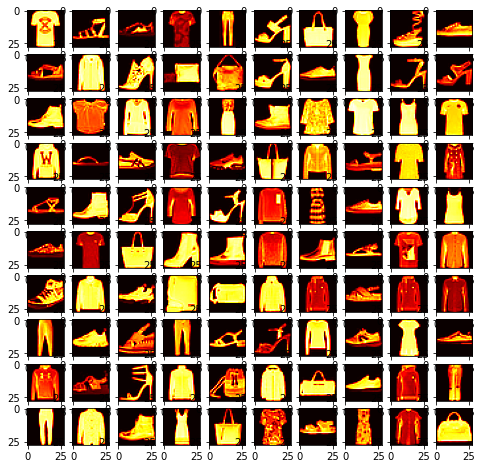

In [ ]:
# plot images 10*10 images with their class names
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(x_train[np.random.randint(0,5001),:].reshape(28,28,order="F"), cmap="hot") #reshape back to 20 pixel by 20 pixel
        # axis[i,j].axis("off")

### Computing the Cost Function


$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \Theta_j^2$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ for $j=0$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\Theta_j$ for $j\geq 1$

In [ ]:
# implement sigmoid function
def sigmoid(z):

 return 1/(1 + np.exp(-z))


In [ ]:
# Implement cost function returning cost and gradient
# Takes in numpy array of theta, X, y, and float lambda to compute the regularized logistic cost function 
def LogisticCostFunction(X,y,theta,Lambda):
  no_of_samples = len(y)
  # no_of_samples = 12000
  h = sigmoid(X.dot(theta))
  error = (-1*y * np.log(h)) - ((1-y)*np.log(1-h))
  error = np.nan_to_num(error,nan=0)
  cost = (1/no_of_samples)*sum(error)
  reg_term = (Lambda/(2*no_of_samples))*(sum(theta**2))
  reg_cost = cost+reg_term

  # calculating grad
  J_0 = 1/no_of_samples *(np.dot(X.transpose(),(h-y)))[0]

  J_1 = 1/no_of_samples *(np.dot(X.transpose(),(h-y)))[1:] + (Lambda/no_of_samples)*theta[1:]

  grad= np.vstack((J_0[:,np.newaxis],J_1))
  return reg_cost[0],grad
 

In [ ]:
# Implement gredient decent 
# takes in numpy array X, y and theta, learning rate alpha, number of iteration and regularization parametter Lambda
# returns theta and the list of the cost of theta during each iteration
def LogisticGradientDescent(X,y,theta,alpha,num_iter,Lambda):
  no_of_samples = len(y)
  J_history = []
  for  i in range(num_iter):
    cost,grad = LogisticCostFunction(X,y,theta,Lambda)
    # cost,grad = costFunctionReg__(theta,X,y,Lambda)
    theta = theta - (alpha*grad)
    J_history.append(cost)

  return theta, J_history   



### Binary Classification

In [ ]:
# create a new training set including  only two classes from 10 classses of MNIST Fashion dataset
# this dataset will have classes such as class 1 and class 3  
m = len(y_train)
# print(y_train.shape)
x_train =x_train.reshape(60000,784)
x_test =x_test.reshape(10000,784)
x_new_train_set = np.zeros([60000,784])
y_new_train_set = np.zeros([60000])
size = 0 
for i in range (m):
  if(y_train[i]==1):
        y_new_train_set[size] = y_train[i]
        x_new_train_set[size] = x_train[i]
        size+=1
  elif(y_train[i]==3):
        y_new_train_set[size] = y_train[i]
        x_new_train_set[size] = x_train[i]
        size+=1

y_new_train_set =  y_new_train_set[:size]
x_new_train_set_for_predict_func = x_new_train_set =  x_new_train_set[:size,:]
for i in range(size):
  if(y_new_train_set[i]==3):
    y_new_train_set[i] = 1
  elif(y_new_train_set[i]==1):
    y_new_train_set[i] = 0

m = len(y_test)
# print(y_test.shape)
x_new_test_set = np.zeros([10000,784])
y_new_test_set = np.zeros([10000])
size = 0 
for i in range (m):
  if(y_test[i]==1):
        y_new_test_set[size] = y_test[i]
        x_new_test_set[size] = x_test[i]
        size+=1
  elif(y_test[i]==3):
        y_new_test_set[size] = y_test[i]
        x_new_test_set[size] = x_test[i]
        size+=1

y_new_test_set =  y_new_test_set[:size]
x_new_test_set =  x_new_test_set[:size,:]

for i in range(size):
  if(y_new_test_set[i]==3):
    y_new_test_set[i] = 1
  elif(y_new_train_set[i]==1):
    y_new_test_set[i] = 0

In [ ]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)

    X_norm = (X - mean)/std

    return X_norm , mean , std

In [ ]:
# reshape and normolize your train and test dadaset
Lambda = 1
alpha = 0.2
num_iter = 800
x_new_train_set , X_mean, X_std = featureNormalization(x_new_train_set )
x_new_train_set = np.hstack((np.ones((x_new_train_set.shape[0],1)),x_new_train_set))
x_new_train_set_for_predict_func = np.hstack((np.ones((x_new_train_set_for_predict_func .shape[0],1)),x_new_train_set_for_predict_func ))
y_new_train_set = y_new_train_set[:,np.newaxis]
initial_theta =   np.zeros((x_new_train_set.shape[1], 1))

print(x_new_train_set.shape)
print(y_new_train_set.shape)
print(initial_theta.shape)

# x_new_test_set , X_mean, X_std = featureNormalization(x_new_test_set)
x_new_test_set = np.hstack((np.ones((x_new_test_set.shape[0],1)),x_new_test_set))
initial_theta =   np.zeros((x_new_test_set.shape[1], 1))
y_new_test_set = y_new_test_set[:,np.newaxis]


(12000, 785)
(12000, 1)
(785, 1)


In [ ]:
# run gredient descent optimization to learn these two classes
# this is a binary classificcation
# cost, grad = LogisticCostFunction(x_new_train_set,y_new_train_set,initial_theta,1)
# print(cost)

theta , J_history = LogisticGradientDescent(x_new_train_set,y_new_train_set,initial_theta,0.2,1500,1)

print(J_history)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


[0.6931471805600651, 0.24331773215547012, 0.13276439083327066, 0.12258797698677978, 0.11654153320985802, 0.11211111892607302, 0.1085290511814256, 0.10547602411855805, 0.10282348653689434, 0.10048978743037357, 0.09841608282084757, 0.0965581418753752, 0.09488174913986186, 0.09335985233955996, 0.09197068958475493, 0.09069650606494079, 0.08952264409001608, 0.08843687981987211, 0.08742892880195824, 0.08649007041437562, 0.08561285810655335, 0.0847908928135533, 0.0840186436919452, 0.08329130483024022, 0.08260467966125475, 0.08195508694875771, 0.08133928374622815, 0.08075440182881534, 0.08019789490932985, 0.07966749455111277, 0.0791611731434754, 0.07867711264955018, 0.078213678100445, 0.07776939501390293, 0.07734293007504268, 0.07693307454197505, 0.0765387299381524, 0.07615889567220144, 0.07579265828916235, 0.07543918210799115, 0.07509770104139275, 0.07476751142765016, 0.07444796573156585, 0.0741384669942217, 0.07383846392989082, 0.07354744658387656, 0.07326494247793938, 0.07299051318066854, 0

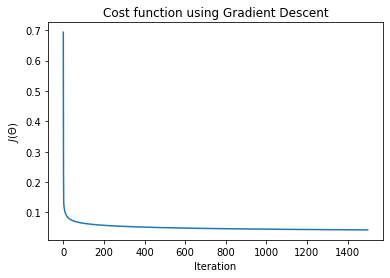

In [ ]:
# plot cost function
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()


In [ ]:
# Implement prediction function 
def predict(X,theta):
  predictions=X.dot(theta)
  return predictions>0


In [ ]:
# compute accuracy
p = predict(x_new_train_set_for_predict_func,theta)
print("Training Accuracy:",(sum(p==y_new_train_set)/len(y_new_train_set)*100)[0],'%')
p = predict(x_new_test_set,theta)
print("Testing  Accuracy:",(sum(p==y_new_test_set)/len(y_new_test_set)*100)[0],'%')


Training Accuracy: 96.56666666666666 %
Testing  Accuracy: 70.89999999999999 %


### One-vs-all Classification

In [ ]:
# Implement oneVsAll function to train the model for 10 classes
# The function takes X, y, number of labels,iteration number , learning rate alpha, regularitation parametter Lambda
# It returns theta and the list of the cost of theta during each iteration
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train) , (x_test,y_test) = fashion_mnist.load_data()
num_of_classes = 10

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test  /=255
x_train =x_train.reshape(60000,784)
x_test =x_test.reshape(10000,784)  

In [ ]:
# # reshape and normalize your train and test dataset for 10 classes
x_train = np.hstack((np.ones((x_train.shape[0],1)),x_train))
x_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))

y_test  = y_test [:,np.newaxis]
y_train = y_train[:,np.newaxis]

# y10_train = np.zeros((len(y_train),10))
# y10_test  = np.zeros((len(y_test),10))

# for i in range(0,10):
#       y10_train[:,i][:,np.newaxis] = np.where(y_train==i,1,0)
#       y10_test [:,i][:,np.newaxis] = np.where(y_test==i,1,0)
initial_theta =  np.zeros((x_train.shape[1], 1))

In [ ]:
def OneVsAll(X,y,theta,num_labels,alpha,num_iter,Lambda):  
  all_theta = []
  all_J = []
  for i in range(num_labels):
    theta,J_history = LogisticGradientDescent(X,np.where(y==i,1,0),theta,alpha,num_iter,Lambda)
    all_theta.extend(theta)
    all_J.extend(J_history)
  return np.array(all_theta).reshape(num_labels,X.shape[1]), all_J 

In [ ]:
# Train your model with 10 classes using OneVsAll function 
num_labels =10 
alpha =0.1
num_iter = 300
Lambda = 1
all_theta, all_J  = OneVsAll(x_train,y_train,initial_theta,num_labels,alpha,num_iter,Lambda)
print(all_J)

[0.6931471805590049, 0.4509219348053722, 0.37343017221326513, 0.32765074411484907, 0.3058721186346606, 0.29188571429899324, 0.27993084569336324, 0.2693429123717548, 0.25988888880085803, 0.25139559819941126, 0.2437270485674356, 0.23677367808814465, 0.2304454126368487, 0.22466700223465585, 0.21937478628226886, 0.2145143759188827, 0.21003894055513772, 0.20590790410789003, 0.20208592771617484, 0.1985420990389368, 0.1952492749448319, 0.19218354115887043, 0.1893237631584381, 0.18665120964553197, 0.18414923465754274, 0.18180300765730156, 0.17959928327803307, 0.17752620410757192, 0.17557313117904233, 0.17373049781928698, 0.17198968327640854, 0.1703429031594955, 0.16878311421602463, 0.16730393137307414, 0.16589955529673675, 0.16456470899566622, 0.16329458221966026, 0.16208478259207418, 0.16093129257222977, 0.1598304314759589, 0.15877882189377268, 0.15777335994026556, 0.15681118884778544, 0.15588967548519098, 0.15500638943982034, 0.15415908434988826, 0.15334568121627215, 0.15256425345857208, 0.1

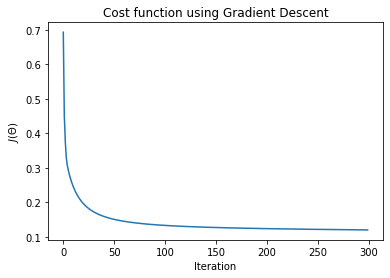

In [ ]:
# plot cost function
#plot of one portion
plt.plot(all_J[:300])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()


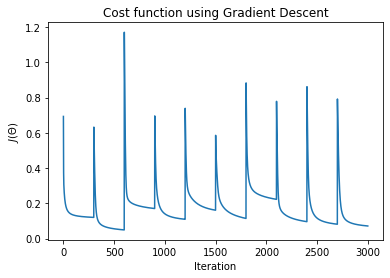

In [ ]:
# plot cost function
#plot of all portions
plt.plot(all_J[:3000])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

### One-vs-all Prediction

In [ ]:
# Implement prediction function 
def predictOneVsAll(X,all_theta):
  prediction = np.dot(X,all_theta.T)
  return np.argmax(prediction,axis=1)
  # return prediction

In [ ]:
#Calculate the accuracy of your model for test dataset
p = predictOneVsAll(x_test,all_theta)
print("Test Accuracy:",sum(p[:,np.newaxis]==y_test)[0]/len(y_test)*100,'%')
# print(p.shape)
# print(y10_train.shape)

Test Accuracy: 77.59 %
